In [1]:

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from Functions import *
import math as math
from scipy import signal
import cv2 as cv
import itertools
axis_font = {'fontname':'Arial', 'size':'16'}
%matplotlib inline

2.1.1

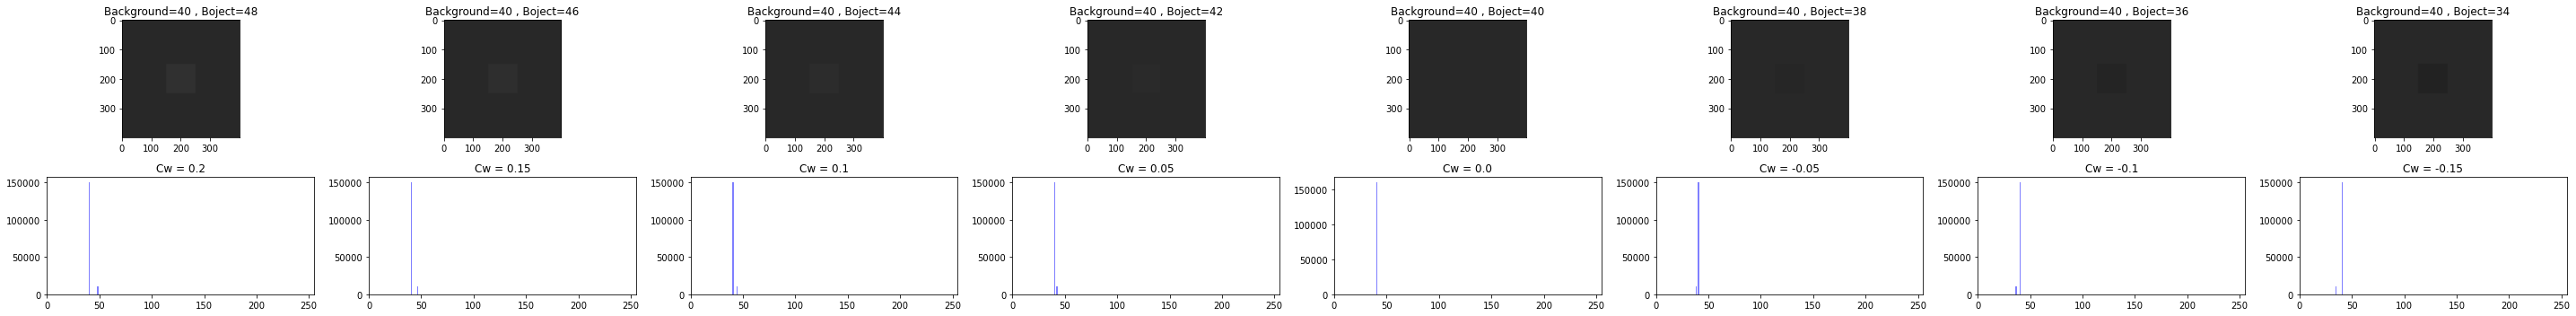

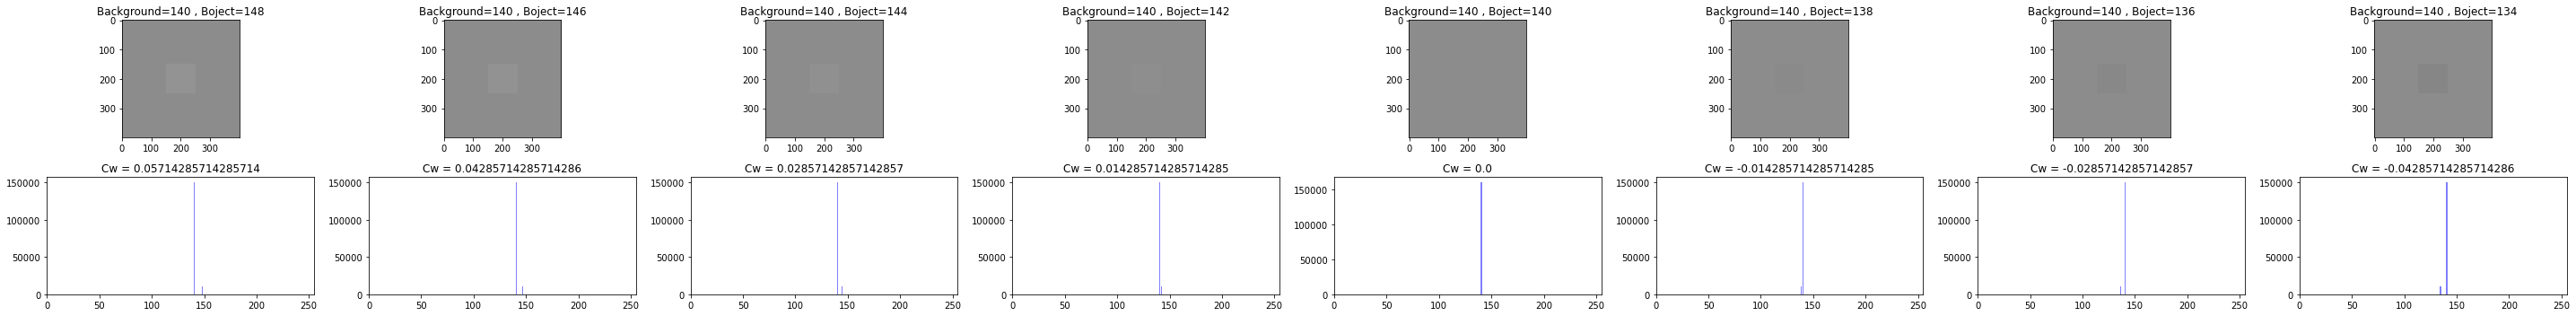

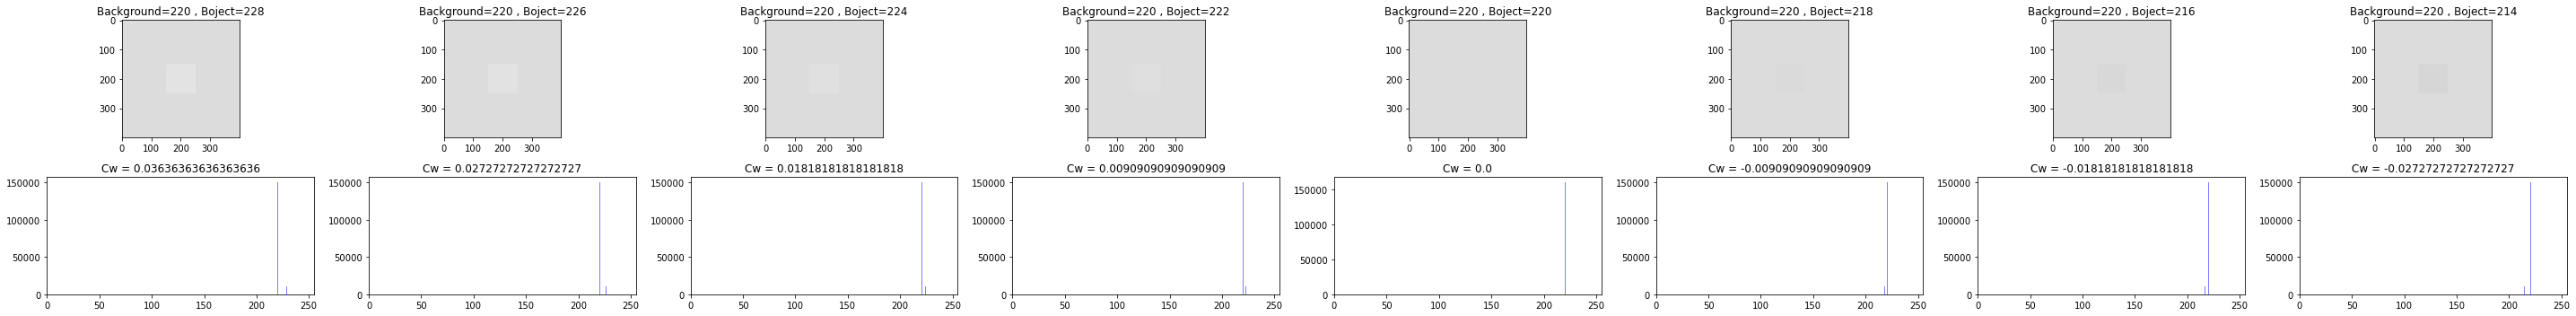

In [2]:
backgrounds = np.array([40,140,220],dtype='uint8')
moving = 2
for background in backgrounds:  
    
    square_img = np.ones((400,400)) * background
    ax,axes = plt.subplots(2,8,figsize=[40,5])
    for j in range (1,9):
        bObject= background+10-j*moving
        square_img[150:250,150:250] = bObject
        axes[0][j-1].imshow(square_img,cmap='gray', vmin=0, vmax=255)
        axes[0][j-1].set_title(f"Background={background} , Boject={bObject}")
        axes[1][j-1].hist(square_img.ravel(), bins = [i for i in range(0,255)], facecolor='blue', alpha=0.5,       stacked=True)
        axes[1][j-1].set_xlim([0,255])
        Cw = ((background+10-j*moving)-background)/background
        axes[1][j-1].set_title(f"Cw = {Cw}")
    plt.tight_layout()
    plt.show()

Graphic repsentation for our results:

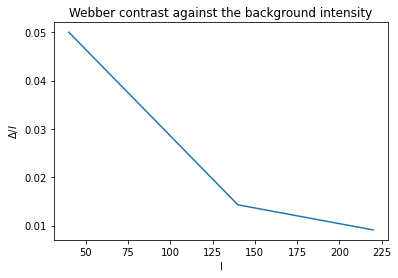

In [3]:
backgroundIntensity=[40, 40 ,140 ,140, 220, 220]
WebberContrast=[0.05, 0.05, 0.014286 ,0.014286, 0.0090909, 0.0090909]
plt.plot(backgroundIntensity,WebberContrast)
plt.title("Webber contrast against the background intensity")
plt.xlabel('I')
plt.ylabel(r"$\Delta/I$")
plt.show()

Graphic representation in a darker room

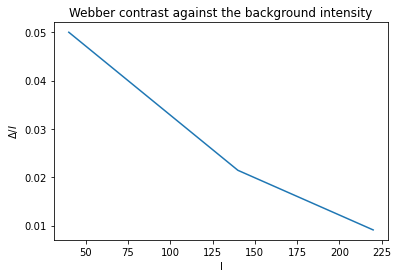

In [4]:
backgroundIntensity=[40, 40 ,140 ,140, 220, 220]
WebberContrast=[0.05 ,0.05 ,0.021429, 0.021429, 0.0090909 ,0.0090909]
plt.plot(backgroundIntensity,WebberContrast)
plt.title("Webber contrast against the background intensity")
plt.xlabel('I')
plt.ylabel(r"$\Delta/I$")
plt.show()

2.1.2

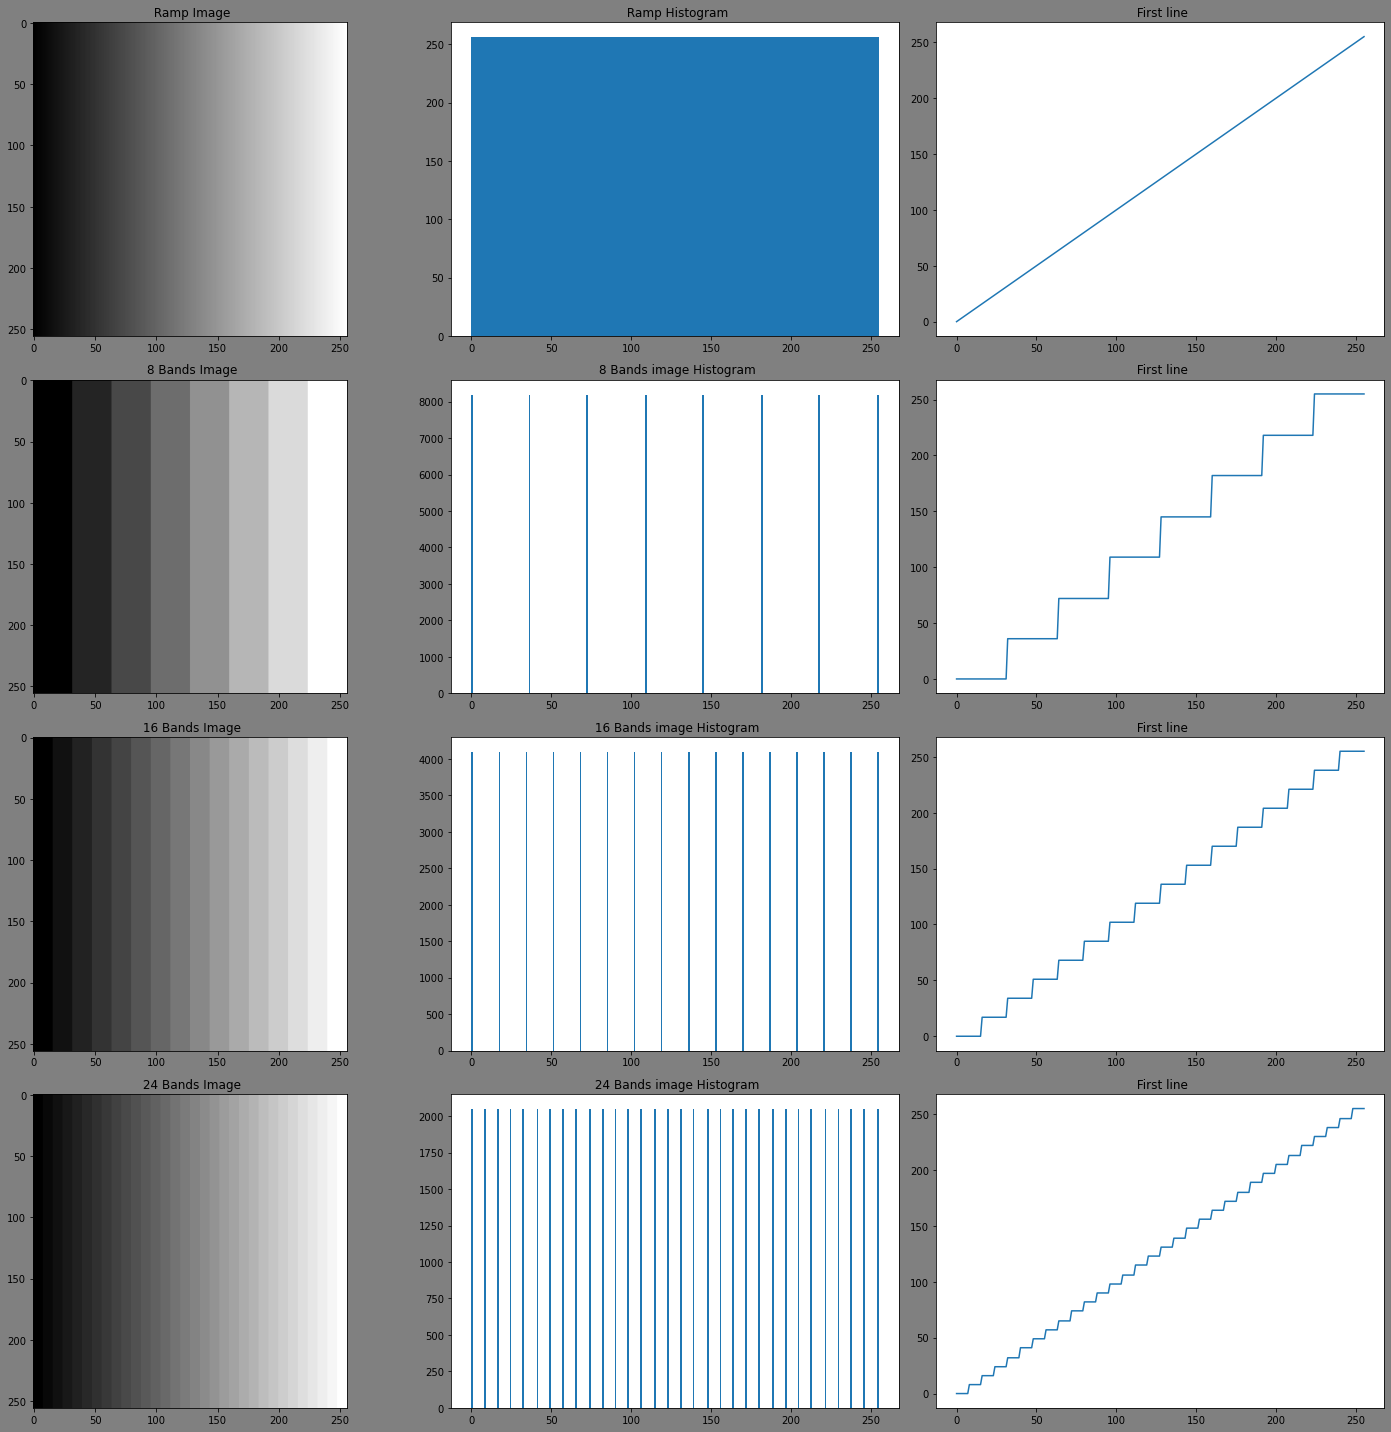

In [5]:
n = np.arange(0,256,1,dtype='uint8')
rampSize = 256 ; minBrighness=0; maxBrightness = 255
RampLine = np.linspace(minBrighness,maxBrightness,rampSize,dtype="uint8")

stripesLines = [] ; numberOfStrips = 8

for i in range (0,3):
    stripesLines.append(np.linspace(minBrighness,maxBrightness,numberOfStrips,dtype="uint8"))
    numberOfStrips*=2

strips = [] ; numberOfStrips = 8

Ramp = StripesUnit8((rampSize,rampSize),(rampSize,1),256,RampLine)

for stripeLine in stripesLines :
    strips.append(StripesUnit8((rampSize,rampSize),(rampSize,int(rampSize/numberOfStrips)),numberOfStrips,stripeLine))
    numberOfStrips*=2
    
figure ,axis = plt.subplots(4,3,figsize=[20,20])

for indicator in range(0,12) :
    if indicator == 0 :
        axis[indicator,0].imshow(Ramp,cmap='gray', vmin=0, vmax=255)
        axis[indicator,0].set_title(" Ramp Image")
    elif indicator < 4 :
        axis[indicator,0].imshow(strips[indicator-1],cmap='gray', vmin=0, vmax=255)
        axis[indicator,0].set_title(f" {indicator*8} Bands Image")
    elif indicator ==  4:
        axis[indicator-4,1].hist(Ramp.ravel(),bins=rampSize,stacked=True)
        axis[indicator-4,1].set_title(" Ramp Histogram")
    elif (indicator > 4 and indicator < 8):
        axis[indicator-4,1].hist(strips[indicator-5].ravel(),bins=rampSize,stacked=True)
        axis[indicator-4,1].set_title(f" {(indicator-4)*8} Bands image Histogram")
    elif ( indicator == 8):
        axis[indicator-8,2].plot(n,Ramp[0])
        axis[indicator-8,2].set_title(" First line")
    elif ( indicator >8):
        axis[indicator-8,2].plot(n,strips[indicator-9][0])
        axis[indicator-8,2].set_title(" First line")
figure .patch.set_facecolor('gray')
plt.tight_layout()

2.2.1 + c

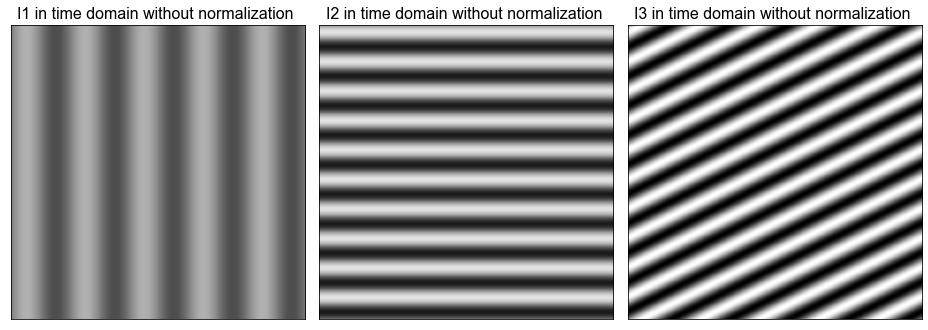

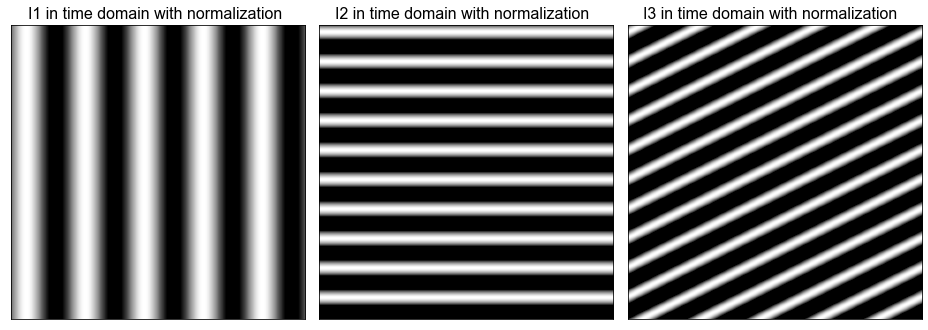

In [6]:
#define the parameters for each sine
fx1=5 ; A1=50
fy2=10 ; A2=100
fx3=5 ; fy3=10 ; A3=127
fs = 255 ; Ts = 1/fs ; t = np.arange(0,1,1/fs)
offset = 127 
#--------------------------------------------
#define sampling frequency that will suffice niquist theorem for each sine
#and use the sampled sine function to crate the sines

I1 = np.array([offset + A1*np.sin(2*np.pi*fx1*t)]*fs,dtype="uint8")
I2 = np.transpose(np.array([[offset + A2*np.sin(2*np.pi*fy2*t)]*fs],dtype="uint8"))
I3 = SpatialSinus(A3, fx3 , fy3 , fs , fs+1 , fs+1,offset)
titles1 = ["I1 in time domain without normalization " ,"I2 in time domain without normalization " ,"I3 in time domain without normalization " ]
titles2 = ["I1 in time domain with normalization " ,"I2 in time domain with normalization  " ,"I3 in time domain with normalization  " ]
plots = [I1,I2,I3]
fig , axis = plt.subplots(1,3,figsize=[13,5])
for (ax,title,plot)  in itertools.zip_longest(axis,titles1,plots) :
    ax.imshow(plot,cmap='gray', vmin=0, vmax=255)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title,**axis_font)
plt.tight_layout()
fig , axis = plt.subplots(1,3,figsize=[13,5])
for (ax,title,plot)  in itertools.zip_longest(axis,titles2,plots) :
    ax.imshow(plot/np.amax(plot),cmap='gray', vmin=0.5, vmax=1.0 )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title,**axis_font)
plt.tight_layout()    

2.3.2.2

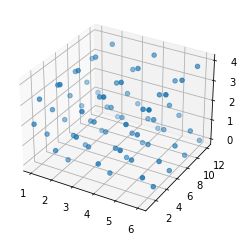

Matrix of x*h 2d 
 [[2 3 1 2 3 1 2 3 1 2 3 1]
 [1 4 0 1 4 0 1 4 0 1 4 0]
 [2 3 1 2 3 1 2 3 1 2 3 1]
 [1 4 0 1 4 0 1 4 0 1 4 0]
 [2 3 1 2 3 1 2 3 1 2 3 1]
 [1 4 0 1 4 0 1 4 0 1 4 0]]


In [7]:
x= np.array([[2,3,1],[1,4,0]])
h = np.zeros((2*np.size(x,0)+1,3*np.size(x,1)+1),dtype='uint8')
h[0::2,0::3] = 1
y = signal.convolve2d(x,h)
xs = np.array([[i]*12 for i in range(1,7)])
ys= np.array([[i for i in range(1,13)]]*6)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d')) 
ax.scatter(xs,ys,y)
plt.show()
print("Matrix of x*h 2d \n",y)

2.3.2.2 
b

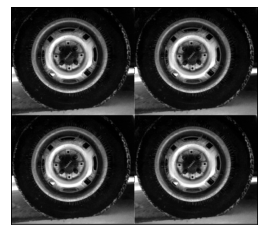

In [8]:
img = np.array(cv.imread('Pictures\\tire.tif',cv.IMREAD_GRAYSCALE),dtype='uint8')
hight , width = np.shape(img)
h = np.zeros((hight,width),dtype='uint8')
h[0,-1]=h[0,0]=h[-1,-1]=h[-1,0] = 1
picture = signal.convolve2d(img,h)
ShowGrayImg(picture)

2.3.2.2 
c

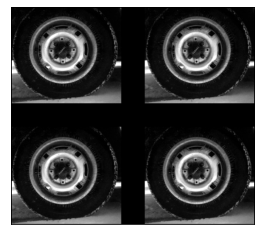

In [9]:
img = np.array(cv.imread('Pictures\\tire.tif',cv.IMREAD_GRAYSCALE),dtype='uint8')
hight , width = np.shape(img)
z=50
h = np.zeros((hight+z,width+z),dtype='uint8')
h[0,-1]=h[0,0]=h[-1,-1]=h[-1,0] = 1
picture = signal.convolve2d(img,h)
ShowGrayImg(picture)

2.3.3.3

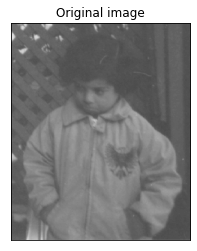

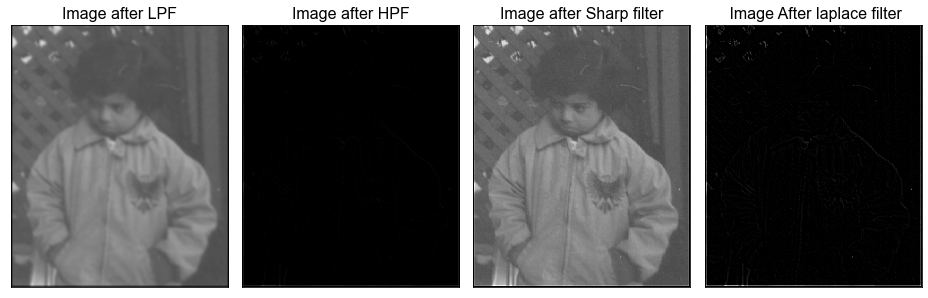

In [53]:
img = np.array(cv.imread('Pictures\\pout.tif',cv.IMREAD_GRAYSCALE),dtype='uint8')

#filters definition 
filters = []
filters.append(1/9* np.ones((3,3))) # LPF filter
filters.append(-1*filters[0]) # HPF filter
filters[1][1,1] = 8/9
filters.append(np.array(filters[1])) # Sharp filter
filters[2][1,1] = 17/9
filters.append( np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])) # Laplac filter
#--------------------------------------------
imageAfterFiltiring = []
titles = ["Image after LPF" ,"Image after HPF","Image after Sharp filter"," Image After laplace filter"]
for filterFromList in filters:
    imageAfterFiltiring.append(signal.convolve2d(img,filterFromList))
ShowGrayImg(img,"Original image")
fig , axis = plt.subplots(1,4,figsize=[13,5])
for (ax,image,title) in itertools.zip_longest(axis,imageAfterFiltiring,titles):
    ax.imshow(image,cmap='gray', vmin=0, vmax=255)
    ax.set_title(title,**axis_font)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()

2

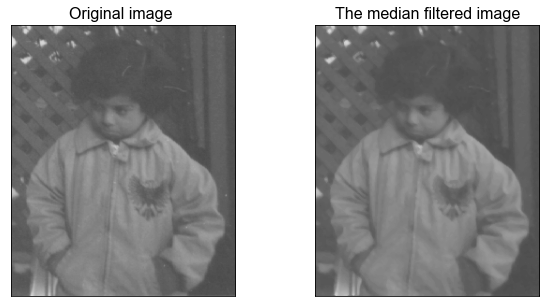

In [54]:
images = [np.array(cv.imread('Pictures\\pout.tif',cv.IMREAD_GRAYSCALE),dtype='uint8')]
images.append(signal.medfilt(img))
titles = ["Original image " , "The median filtered image"]
fig,axis = plt.subplots(1,2,figsize=[10,5])
for (ax,img,title) in itertools.zip_longest(axis,images,titles):
    ax.imshow(img,cmap='gray', vmin=0, vmax=255)
    ax.set_title(title,**axis_font)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


2.3.3.4.1 
Adding noise to an image with noise_random method from skimage library 